In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from importlib import reload
import functions_model_eval_val as f
reload(f)

<module 'functions_model_eval_val' from 'e:\\Pima-Diabetes-Prediction\\notebooks\\functions_model_eval_val.py'>

In [22]:
df = pd.read_csv('../data/processed/data_remove_yes_balance_yes_scale_no.csv')

## ML Models

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='outcome'), df['outcome'], test_size=0.2, stratify=df['outcome'], random_state=42 )

In [24]:
models = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    "BaggingClassifier": BaggingClassifier(estimator=DecisionTreeClassifier()),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(estimator=DecisionTreeClassifier()),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(verbose=-1)
}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    classification_metrics, proba_predictions_dict = f.save_metrics(model, model_name, x_test, y_test, y_pred)

## Model Evaluation

### Classification Metrics

In [25]:
classification_metrics.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,PR AUC
4,GaussianNB,0.855,0.838095,0.88,0.858537,0.91860,0.919653
0,LogisticRegression,0.855,0.858586,0.85,0.854271,0.92740,0.934953
6,GradientBoostingClassifier,0.825,0.849462,0.79,0.818653,0.91630,0.929910
5,BaggingClassifier,0.815,0.853933,0.76,0.804233,0.90320,0.905232
3,RandomForestClassifier,0.805,0.821053,0.78,0.800000,0.92535,0.936643
9,LGBMClassifier,0.800,0.806122,0.79,0.797980,0.90270,0.922713
1,KNeighborsClassifier,0.795,0.797980,0.79,0.793970,0.88315,0.871267
8,XGBClassifier,0.795,0.804124,0.78,0.791878,0.89540,0.912935
2,DecisionTreeClassifier,0.785,0.787879,0.78,0.783920,0.78500,0.724545
7,AdaBoostClassifier,0.770,0.764706,0.78,0.772277,0.77000,0.706471


In [36]:
best_models = classification_metrics.sort_values(by='F1 Score', ascending=False).head(4)['Model'].values

### Confusion Matrix

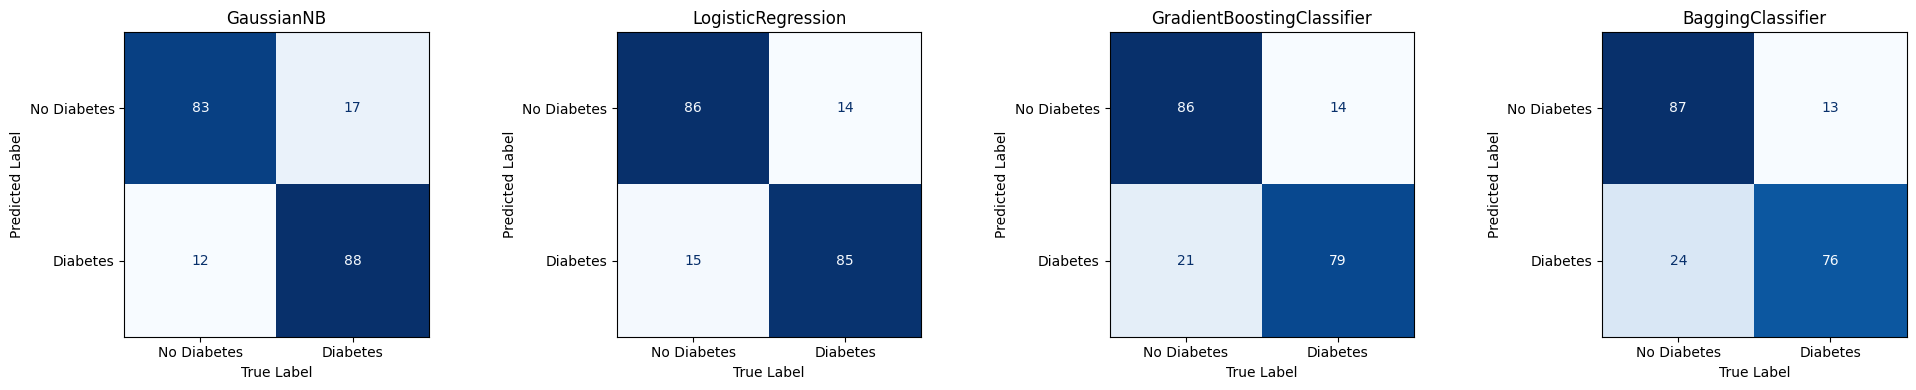

In [37]:
f.display_confusion_matrix(proba_predictions_dict, models = best_models, labels=['No Diabetes', 'Diabetes'], cmap='Blues', models_per_row=4)

### ROC Curve

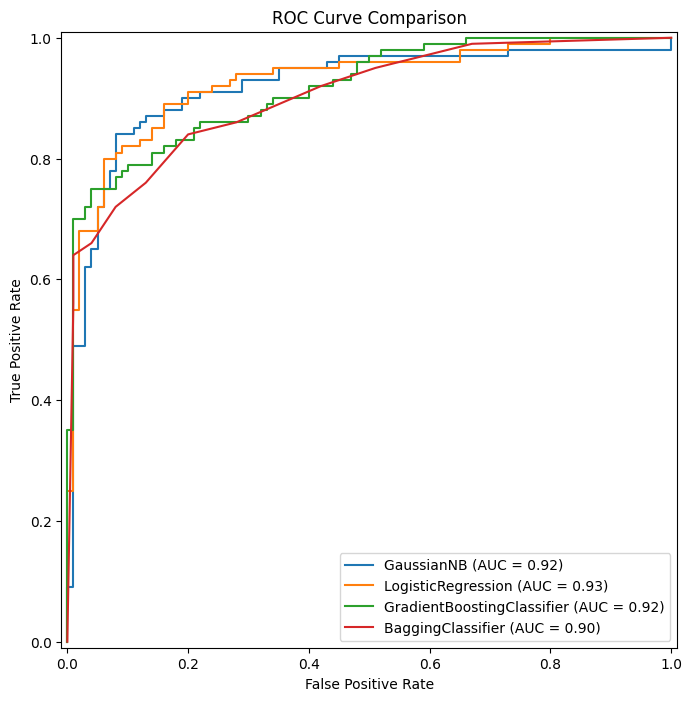

In [41]:
f.display_roc_curves(proba_predictions_dict, models=best_models)

### Precision-Recall Curve

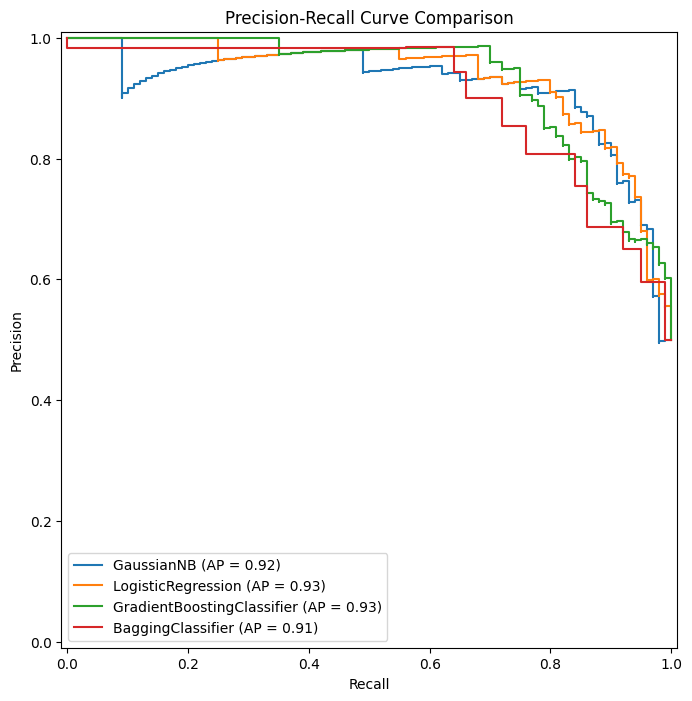

In [42]:
f.display_precision_recall_curve(proba_predictions_dict, models=best_models)

## Model Validation

### K-Fold Validation

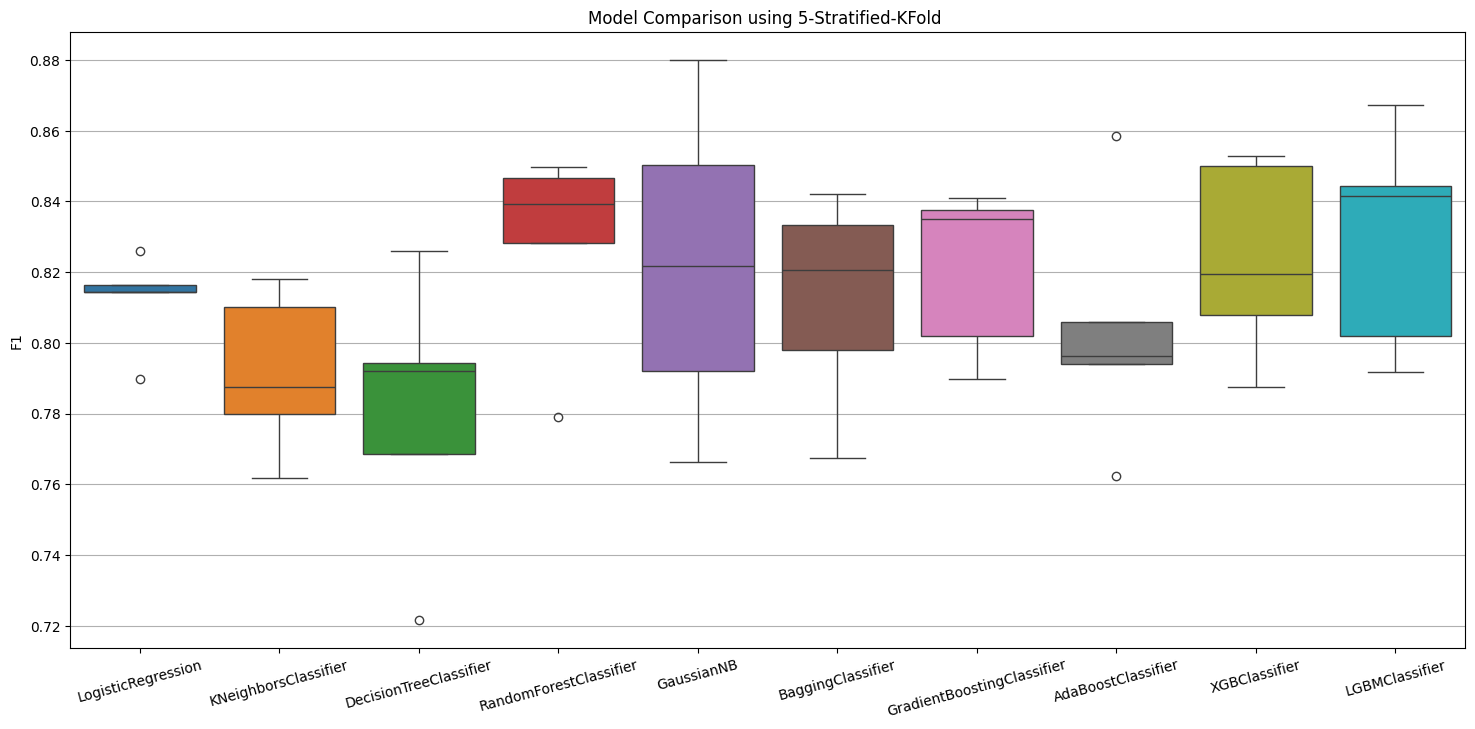

In [44]:
f.evaluate_models_with_kfold(models, df.drop(columns='outcome'), df['outcome'], cv=5, scoring='f1')

### Learning Curve

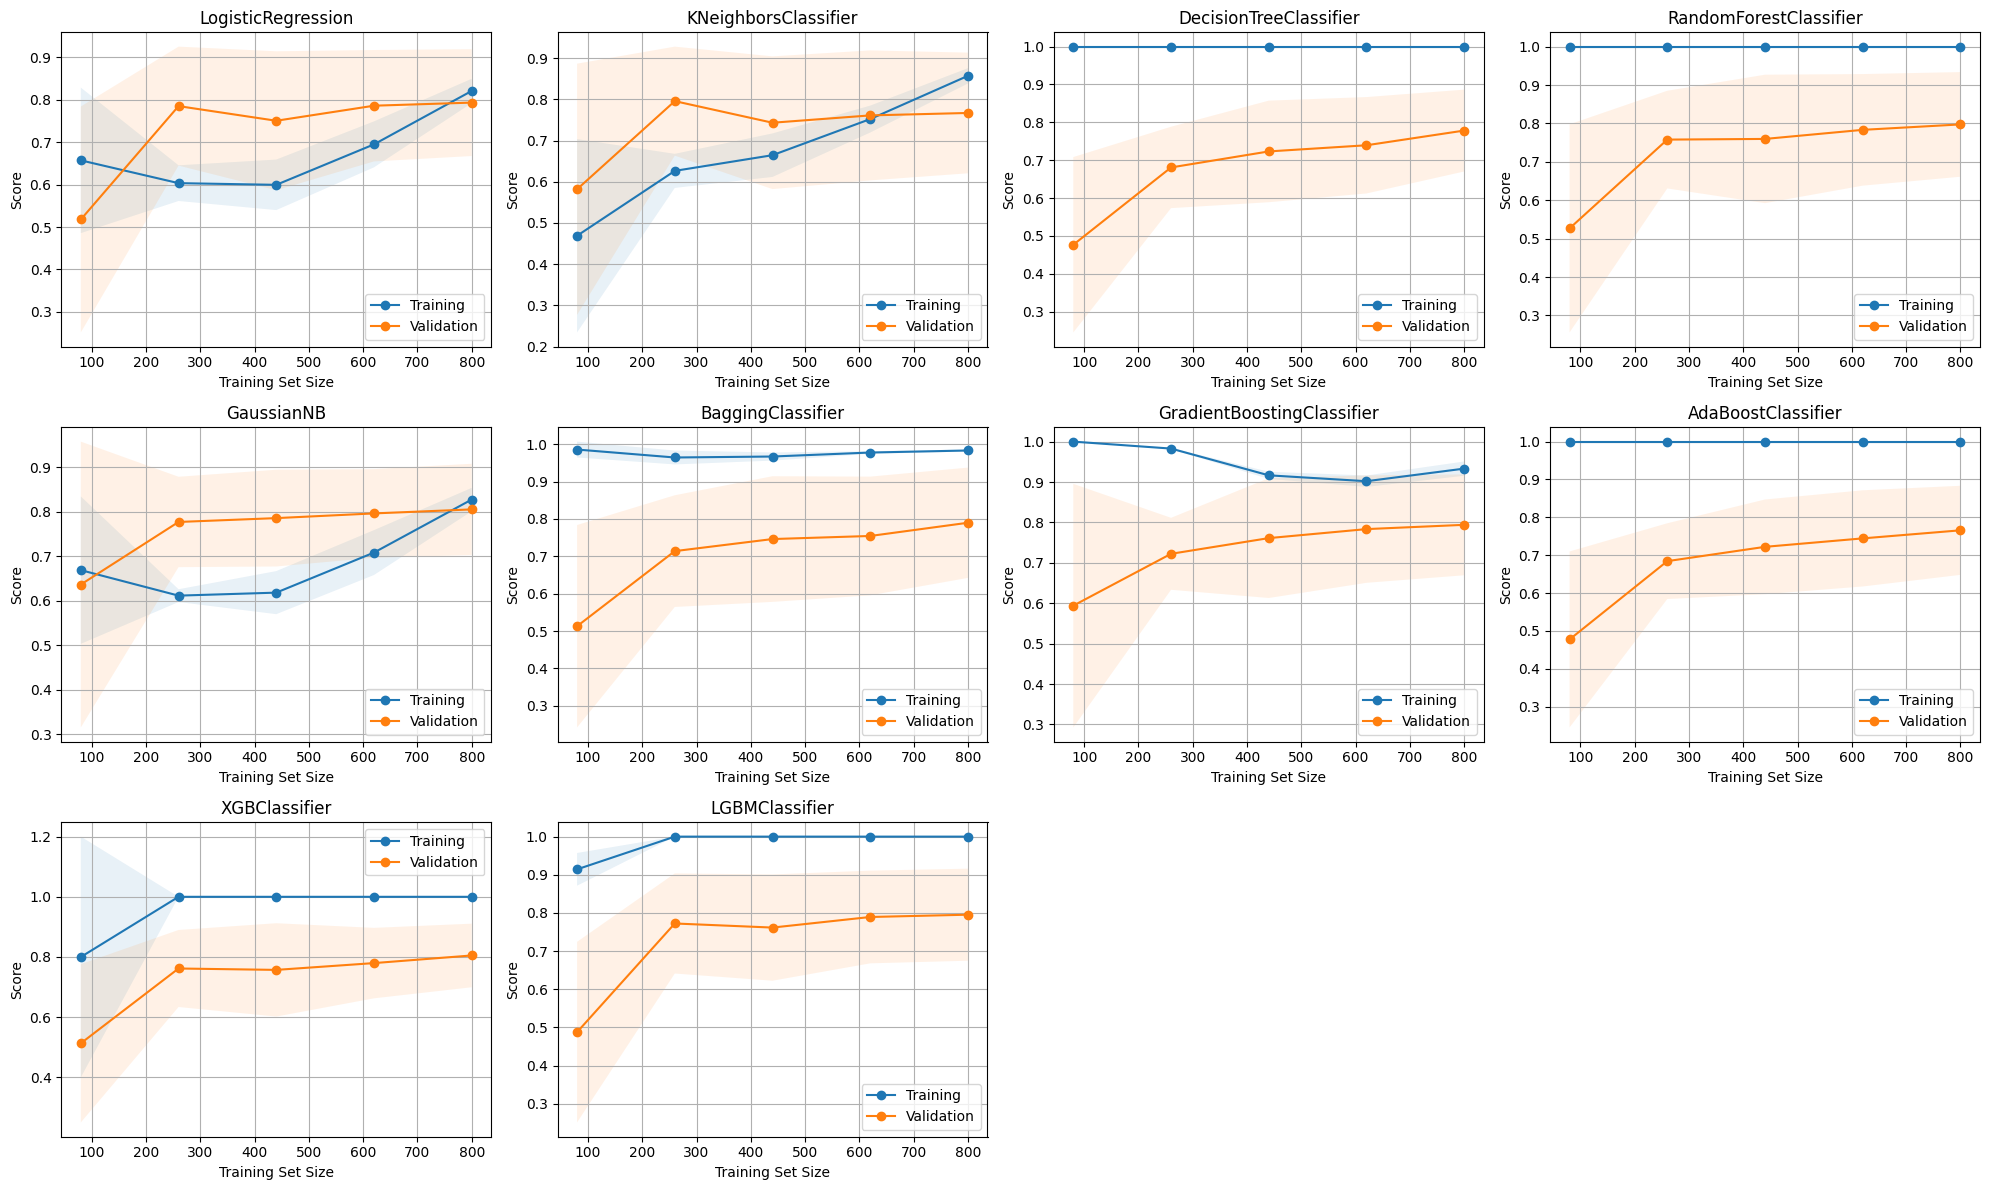

In [45]:
f.plot_learning_curves(models, df.drop(columns='outcome'), df['outcome'], cv=5, scoring='f1', n_jobs=1)